In [1]:
import tensorflow as tf

tf.__version__

'2.4.1'

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test ) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


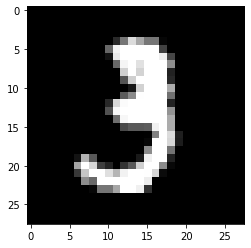

In [5]:
import matplotlib.pyplot as plt
digit = X_train[10]
plt.imshow(digit, cmap='gray')
plt.show()

In [6]:
import numpy as np
np.set_printoptions(linewidth=150)
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

In [7]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255
print(X_train[4])

In [10]:
print(X_train[10])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [11]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

In [12]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(790, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 790)               620150    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               202496    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 825,216
Trainable params: 825,216
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
Hist = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

Epoch 1/100
96/96 [==============================] - 4s 9ms/step - loss: 0.6681 - accuracy: 0.8127 - val_loss: 0.1802 - val_accuracy: 0.9490
Epoch 2/100
96/96 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.9596 - val_loss: 0.1250 - val_accuracy: 0.9628
Epoch 3/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0790 - accuracy: 0.9767 - val_loss: 0.1031 - val_accuracy: 0.9711
Epoch 4/100
96/96 [==============================] - 0s 5ms/step - loss: 0.0561 - accuracy: 0.9841 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 5/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0920 - val_accuracy: 0.9734
Epoch 6/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0274 - accuracy: 0.9927 - val_loss: 0.0976 - val_accuracy: 0.9724
Epoch 7/100
96/96 [==============================] - 0s 4ms/step - loss: 0.0192 - accuracy: 0.9947 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 8/100
9

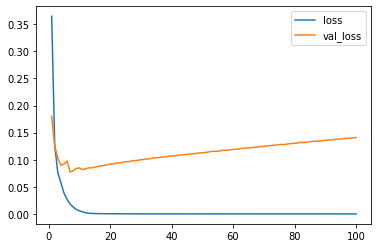

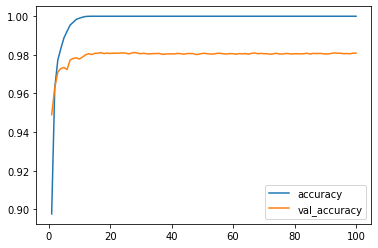

In [17]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9828


(0.10556831955909729, 0.9828000068664551)

In [20]:
np.set_printoptions(suppress=True, precision=9)

print(model.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [21]:
print(model.predict_classes(X_test[:1,:]))

[7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
